# Exploratory Data Analysis - Bookstore

## Informações da tabela

In [95]:
#Importa bibliotecas
import pandas as pd
import matplotlib as plt

#Escolhe categorias mais relevantes para análise (todos os preços são iguais então não é necessário mais de um, num_reviews é sempre 0, description é igual ao title)
data = pd.read_csv(filepath_or_buffer='C:/Users/Laura/Documents/Processos seletivos/Dadosfera/Case extra/bookdata.csv').drop(columns=['product_type', 'tax', 'url', 'description', 'price_excl_tax', 'price_incl_tax', 'upc', 'num_reviews'])

data

,availability,category,price,stars,title
0,19,default,13.99,2,"Since her assault, Miss Annette Chetwynd has b..."
1,20,fiction,50.10,1,"Dans une France assez proche de la nôtre, un h..."
2,19,young adult,22.65,1,Patient Twenty-nine.A monster roams the halls ...
3,20,history,54.23,5,From a renowned historian comes a groundbreaki...
4,20,historical fiction,53.74,1,"""Erotic and absorbing...Written with starling ..."
...,...,...,...,...,...
993,1,nonfiction,51.32,3,"In her early thirties, Elizabeth Gilbert had e..."
994,1,classics,32.93,2,"'I never have been in love; it is not my way, ..."
995,1,default,38.00,2,Mary Shelley began writing Frankenstein when s...
996,1,music,28.80,3,My Happily Ever After was turning into a livin...


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  998 non-null    int64  
 1   category      998 non-null    object 
 2   price         998 non-null    float64
 3   stars         998 non-null    int64  
 4   title         998 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.1+ KB


In [97]:
colunas = ['category', 'price', 'stars', 'availability']
for i in colunas:
    print(i,":",data[i].unique())

category : ['default' 'fiction' 'young adult' 'history' 'historical fiction'
 'business' 'poetry' 'mystery' 'science fiction' 'travel' 'music'
 'sequential art' 'politics' 'thriller' 'art' 'childrens' 'nonfiction'
 'spirituality' 'romance' 'philosophy' 'food and drink' 'new adult'
 'contemporary' 'fantasy' 'add a comment' 'science' 'health' 'horror'
 'self help' 'religion' 'christian' 'crime' 'autobiography'
 'christian fiction' 'biography' 'womens fiction' 'cultural' 'erotica'
 'humor' 'psychology' 'historical' 'novels' 'suspense' 'short stories'
 'classics' 'academic' 'sports and games' 'adult fiction' 'parenting'
 'paranormal']
price : [13.99 50.1  22.65 54.23 53.74 17.93 22.6  33.34 52.15 51.77 47.82 37.59
 45.17 57.25 17.46 52.29 20.66 23.88 51.33 35.02 23.82 44.18 36.89 31.05
 17.66 40.3  54.64 34.53 15.94 25.27 30.52 53.13 22.5  37.32 12.84 52.22
 33.63 19.63 33.29 18.02 45.07 31.77 50.27 16.28 25.52 23.11 18.78 14.27
 26.41 47.61 45.22 56.5  56.41 57.31 19.49 56.13 17.27 19.09 

## Quantidade de livros por categoria

<Axes: xlabel='Categoria', ylabel='Quantidades de livros'>

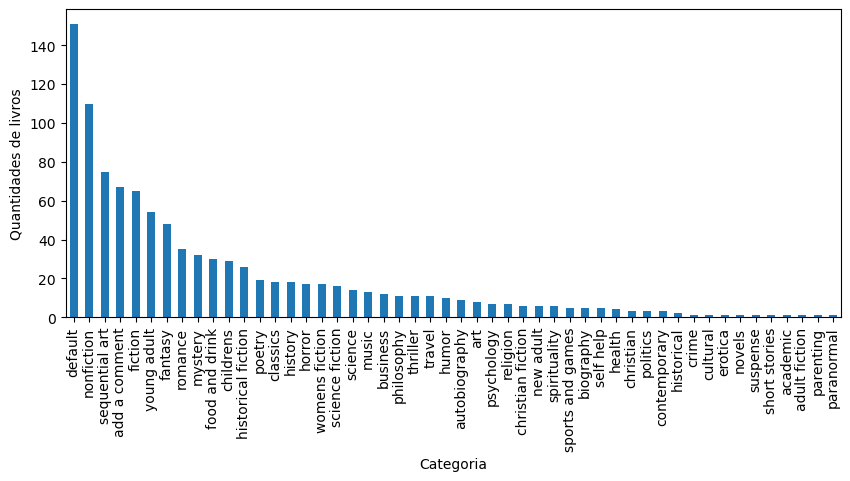

In [123]:
books_by_category = data['category'].value_counts()
books_by_category.plot(kind="bar", xlabel='Categoria', ylabel ='Quantidades de livros', figsize=(10,4))

## Categorias com mais de 20 livros

In [91]:
categories = data['category'].value_counts().sort_values(ascending=False)
for i, value in enumerate(categories):
      if value < 20:
           max_category = i
           break
top_categories = categories.head(max_category)
top_categories

default               151
nonfiction            110
sequential art         75
add a comment          67
fiction                65
young adult            54
fantasy                48
romance                35
mystery                32
food and drink         30
childrens              29
historical fiction     26
Name: category, dtype: int64

## Preço médio de livros por categoria

<Axes: xlabel='Categoria', ylabel='Preço médio dos livros'>

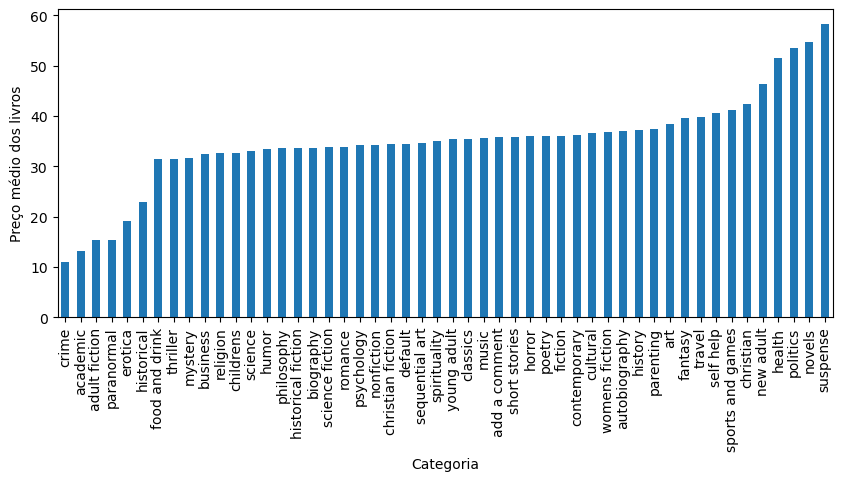

In [124]:
mean_price = data.groupby('category')['price'].mean().sort_values(ascending=True)
mean_price.plot(xlabel='Categoria', ylabel='Preço médio dos livros', kind = 'bar', figsize=(10,4))

### Preço médio por categoria - categorias com mais de 20 livros

<Axes: xlabel='Categoria', ylabel='Preço médio'>

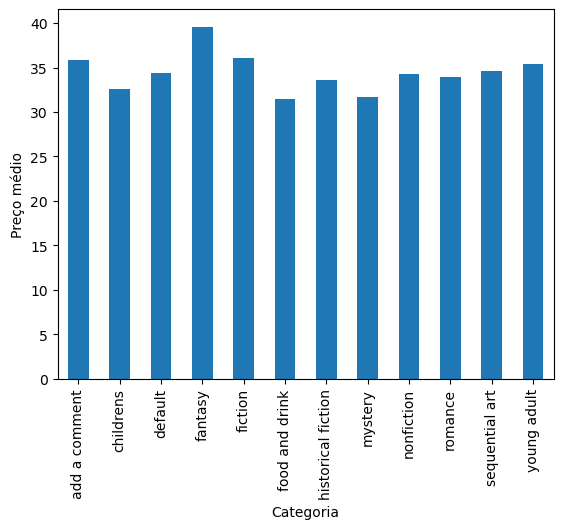

In [104]:
top_categories_mean_price = data.groupby('category').filter(lambda x: len(x) > 20).groupby('category')['price'].mean()
top_categories_mean_price.plot(kind='bar', xlabel='Categoria', ylabel='Preço médio')

## Nota média de livros por categoria

<Axes: xlabel='Categoria', ylabel='Nota média dos livros'>

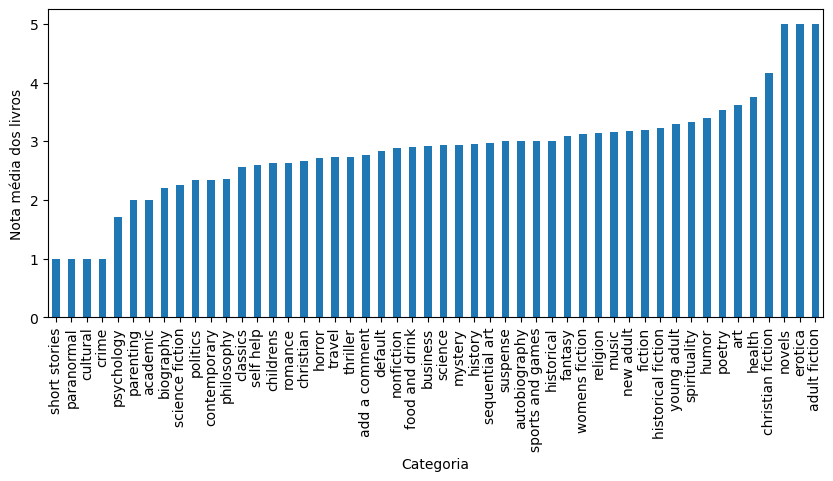

In [125]:
mean_stars = data.groupby('category')['stars'].mean().sort_values(ascending=True)
mean_stars.plot(xlabel='Categoria', ylabel='Nota média dos livros', kind = 'bar', figsize=(10,4))

### Nota média por categoria - categorias com mais de 20 livros

<Axes: xlabel='Categoria', ylabel='Preço médio'>

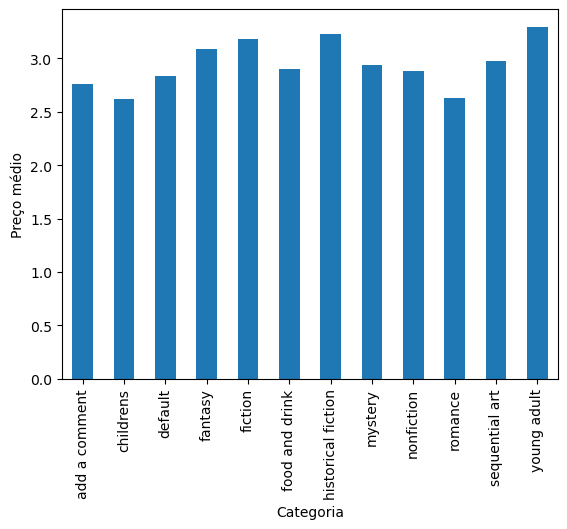

In [105]:
top_categories_mean_stars = data.groupby('category').filter(lambda x: len(x) > 20).groupby('category')['stars'].mean()
top_categories_mean_stars.plot(kind='bar', xlabel='Categoria', ylabel='Nota média')

## Comparação entre nota média dos livros e preço

<Axes: xlabel='category', ylabel='price'>

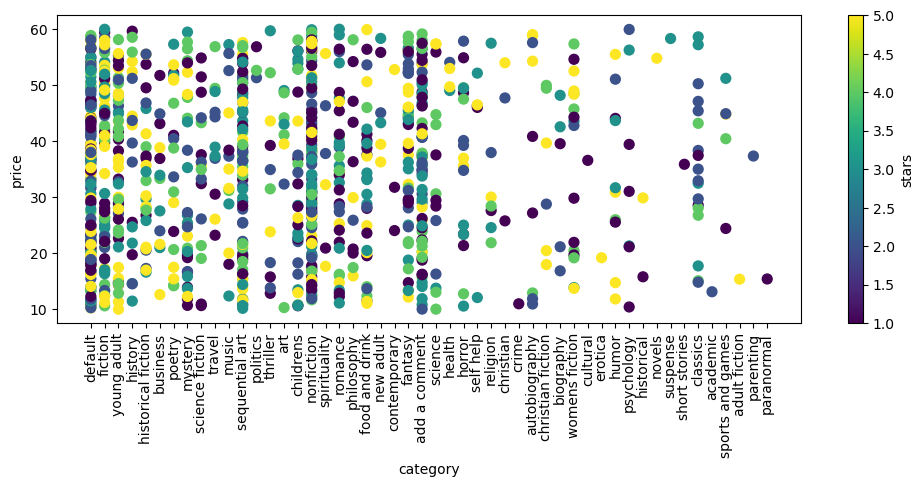

In [121]:
data.plot.scatter(x="category",rot=90, y="price", c="stars", s=50, cmap='viridis', figsize=(12,4))